In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

## 1. 데이터로드

In [2]:
data = pd.read_csv('2022-06-03_14-36-40.csv')

print('전체 리뷰 개수 :',len(data)) # 전체 리뷰 개수 출력
data.head()

전체 리뷰 개수 : 318


,name,ratings,date,comment
0,알수없음,5,2022년 5월 18일,10년전 추억을 살려주셔서 감사합니다. 이 많은 자료들을 버리지 않고 지켜주셔서 너...
1,Jun Sub Shin,3,2022년 4월 7일,싸이월드가 돌아오다니 너무 반갑습니다만 아쉬운점 생각나는거 몇개 적어봅니다. 1. ...
2,Songyeol Hwang,3,2022년 5월 28일,앱 정상화 축하드립니다 다만 앱 디자인 2022년에 맞게 변경하는건 어떤지 아이디어...
3,Aiden Yang,1,2022년 4월 8일,오랜시간 기다림에 비해 실망스런 앱이에요! 1. 메뉴 사용이 너무 불편해요! 사진첩...
4,율,3,2022년 5월 22일,저는 무수한 다이어리를 썼습니다. 폴더도 많고요 예전에는 통합해서 시간 순으로 글들...


In [3]:
data = data.drop(columns=['name','date'])
data

,ratings,comment
0,5,10년전 추억을 살려주셔서 감사합니다. 이 많은 자료들을 버리지 않고 지켜주셔서 너...
1,3,싸이월드가 돌아오다니 너무 반갑습니다만 아쉬운점 생각나는거 몇개 적어봅니다. 1. ...
2,3,앱 정상화 축하드립니다 다만 앱 디자인 2022년에 맞게 변경하는건 어떤지 아이디어...
3,1,오랜시간 기다림에 비해 실망스런 앱이에요! 1. 메뉴 사용이 너무 불편해요! 사진첩...
4,3,저는 무수한 다이어리를 썼습니다. 폴더도 많고요 예전에는 통합해서 시간 순으로 글들...
...,...,...
313,3,드디어 사진첩이 업뎃 됬는데 사진첩만 누르면 어플이 종료됩니다.. 개선해주세요 아직...
314,3,사진은 복구 된거같은데 사진첩을 누르면 튕겨서 나가집니다. 지우고 깔아도 보고 폰을...
315,2,앱을 깐지 한달이 지났는데 사진첩에 한장도 복구가 안됐습니다 시스템도 안정적인거 같...
316,1,사진첩 복구됐다고 알림와서 들어가보니 사진첩에 숫자가생겼음. 두근거리는 마음으로 클...


In [4]:
data['label'] = [0 for i in range(len(data))]

In [5]:
data

,ratings,comment,label
0,5,10년전 추억을 살려주셔서 감사합니다. 이 많은 자료들을 버리지 않고 지켜주셔서 너...,0
1,3,싸이월드가 돌아오다니 너무 반갑습니다만 아쉬운점 생각나는거 몇개 적어봅니다. 1. ...,0
2,3,앱 정상화 축하드립니다 다만 앱 디자인 2022년에 맞게 변경하는건 어떤지 아이디어...,0
3,1,오랜시간 기다림에 비해 실망스런 앱이에요! 1. 메뉴 사용이 너무 불편해요! 사진첩...,0
4,3,저는 무수한 다이어리를 썼습니다. 폴더도 많고요 예전에는 통합해서 시간 순으로 글들...,0
...,...,...,...
313,3,드디어 사진첩이 업뎃 됬는데 사진첩만 누르면 어플이 종료됩니다.. 개선해주세요 아직...,0
314,3,사진은 복구 된거같은데 사진첩을 누르면 튕겨서 나가집니다. 지우고 깔아도 보고 폰을...,0
315,2,앱을 깐지 한달이 지났는데 사진첩에 한장도 복구가 안됐습니다 시스템도 안정적인거 같...,0
316,1,사진첩 복구됐다고 알림와서 들어가보니 사진첩에 숫자가생겼음. 두근거리는 마음으로 클...,0


In [6]:
for i in range(len(data)):
    if data['ratings'][i] >= 3:
        data['label'][i] = 1
    else:
        data['label'][i] = 0

In [7]:
data

,ratings,comment,label
0,5,10년전 추억을 살려주셔서 감사합니다. 이 많은 자료들을 버리지 않고 지켜주셔서 너...,1
1,3,싸이월드가 돌아오다니 너무 반갑습니다만 아쉬운점 생각나는거 몇개 적어봅니다. 1. ...,1
2,3,앱 정상화 축하드립니다 다만 앱 디자인 2022년에 맞게 변경하는건 어떤지 아이디어...,1
3,1,오랜시간 기다림에 비해 실망스런 앱이에요! 1. 메뉴 사용이 너무 불편해요! 사진첩...,0
4,3,저는 무수한 다이어리를 썼습니다. 폴더도 많고요 예전에는 통합해서 시간 순으로 글들...,1
...,...,...,...
313,3,드디어 사진첩이 업뎃 됬는데 사진첩만 누르면 어플이 종료됩니다.. 개선해주세요 아직...,1
314,3,사진은 복구 된거같은데 사진첩을 누르면 튕겨서 나가집니다. 지우고 깔아도 보고 폰을...,1
315,2,앱을 깐지 한달이 지났는데 사진첩에 한장도 복구가 안됐습니다 시스템도 안정적인거 같...,0
316,1,사진첩 복구됐다고 알림와서 들어가보니 사진첩에 숫자가생겼음. 두근거리는 마음으로 클...,0


In [8]:
data['ratings'].nunique()

5

In [9]:
data['comment'].nunique()

318

In [10]:
data['label'].nunique()

2

In [11]:
#data = data.drop_duplicates(subset=['reviews']) # reviews 열에서 중복인 내용이 있다면 중복 제거
#print('총 샘플의 수 :',len(total_data))

In [12]:
print(data.isnull().values.any())

False


## 2. 데이터분리

In [13]:
train_data, test_data = train_test_split(data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 238
테스트용 리뷰의 개수 : 80


## 3. 레이블 분포 확인

<AxesSubplot:>

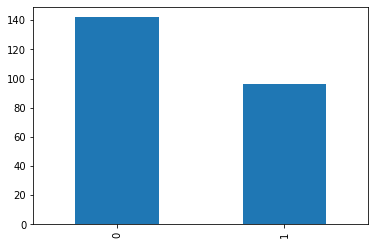

In [14]:
train_data['label'].value_counts().plot(kind = 'bar')

In [15]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0    142
1      1     96


## 4 데이터 정제하기

In [16]:
# 한글과 공백을 제외하고 모두 제거
train_data['comment'] = train_data['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['comment'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

ratings    0
comment    0
label      0
dtype: int64


In [17]:
test_data.drop_duplicates(subset = ['comment'], inplace=True) # 중복 제거
test_data['comment'] = test_data['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['comment'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 80


In [18]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']

## 5. 토큰화

In [19]:
from konlpy.tag import Mecab
mecab = Mecab('C:\mecab\mecab-ko-dic')

train_data['tokenized'] = train_data['comment'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['comment'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

## 6. 단어의 길이 분포 확인

In [20]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [21]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('안', 121), ('는데', 114), ('사진첩', 113), ('업데이트', 106), ('네요', 104), ('복구', 103), ('사진', 97), ('없', 89), ('있', 84), ('어', 74), ('앱', 68), ('다시', 68), ('기', 66), ('으로', 59), ('누르', 55), ('했', 53), ('거', 52), ('수', 48), ('확인', 48), ('로', 47)]


In [22]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('있', 85), ('네요', 74), ('사진', 71), ('사진첩', 67), ('으로', 58), ('복구', 57), ('는데', 55), ('안', 52), ('업데이트', 52), ('습니다', 48), ('없', 46), ('어', 42), ('수', 42), ('좋', 41), ('해', 40), ('기', 39), ('로', 39), ('보', 38), ('겠', 38), ('같', 38)]


긍정 리뷰의 평균 길이 : 50.322916666666664
부정 리뷰의 평균 길이 : 47.12676056338028


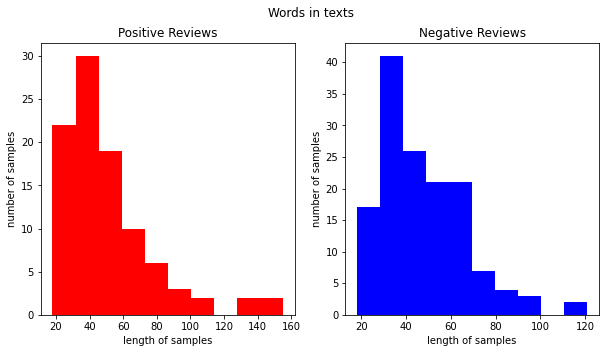

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [24]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

## 7. 정수인코딩

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [26]:
tokenizer.word_index

{'사진첩': 1,
 '네요': 2,
 '안': 3,
 '있': 4,
 '는데': 5,
 '사진': 6,
 '복구': 7,
 '업데이트': 8,
 '없': 9,
 '으로': 10,
 '어': 11,
 '기': 12,
 '다시': 13,
 '앱': 14,
 '수': 15,
 '로': 16,
 '보': 17,
 '거': 18,
 '같': 19,
 '누르': 20,
 '했': 21,
 '해': 22,
 '것': 23,
 '습니다': 24,
 '확인': 25,
 '겠': 26,
 '싸이월드': 27,
 '라고': 28,
 '할': 29,
 '주': 30,
 '시': 31,
 '않': 32,
 '좋': 33,
 '었': 34,
 '추억': 35,
 '계속': 36,
 '해서': 37,
 '나': 38,
 '로그인': 39,
 '뜨': 40,
 '된': 41,
 '지만': 42,
 '니': 43,
 '설치': 44,
 '들어가': 45,
 '찾': 46,
 '어요': 47,
 '합니다': 48,
 '플': 49,
 '최신': 50,
 '많': 51,
 '너무': 52,
 '해도': 53,
 '던': 54,
 '기능': 55,
 '까지': 56,
 '복원': 57,
 '화면': 58,
 '적': 59,
 '싶': 60,
 '접속': 61,
 '버전': 62,
 '버튼': 63,
 '으면': 64,
 '건지': 65,
 '재': 66,
 '삭제': 67,
 '후': 68,
 '았': 69,
 '좀': 70,
 '종료': 71,
 '사용': 72,
 '볼': 73,
 '열': 74,
 '요': 75,
 '반복': 76,
 '오픈': 77,
 '더니': 78,
 '제': 79,
 '세요': 80,
 '예전': 81,
 '왜': 82,
 '어서': 83,
 '됐': 84,
 '아직': 85,
 '라': 86,
 '일촌': 87,
 '됩니다': 88,
 '홈피': 89,
 '다이어리': 90,
 '더': 91,
 '시간': 92,
 '아이디': 93,
 '은데': 94,
 '라는'

In [27]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1967
등장 빈도가 1번 이하인 희귀 단어의 수: 1005
단어 집합에서 희귀 단어의 비율: 51.093035078800206
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.721687060661285


In [28]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 964


In [29]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [30]:
print(X_train[:3])

[[36, 2, 466, 70, 113, 125, 547, 43, 141, 1, 11, 226, 46, 18, 70, 43, 2, 11, 276, 41, 548, 33, 103, 227, 313, 1, 184, 133, 549, 43, 550, 551, 277, 10, 84, 314, 114, 278, 406, 157, 7, 126, 12, 1, 13, 1, 279, 71, 1, 127], [2, 8, 228, 197, 407, 467, 59, 7, 408, 16, 409, 8, 42, 24, 20, 95, 2, 21, 15, 255, 72, 89, 127, 142, 54, 142, 410, 315, 680, 349, 552, 148, 134], [468, 229, 469, 3, 2, 8, 411, 4, 681, 5, 412, 7, 115, 413, 6, 316, 317, 350, 470, 7, 11, 256, 471, 33, 230, 1, 73, 55, 198, 199, 27, 25]]


In [31]:
print(X_test[:3])

[[344, 137, 515, 105, 30, 16, 5, 5, 109, 7, 748, 91, 133, 4, 633, 1, 30, 16, 5, 124, 10, 24, 20, 790, 91, 56, 107, 262, 1, 76, 135, 950, 604, 301, 253, 59, 1, 1, 1, 17, 202, 67, 120, 149, 44, 504, 23, 31, 81, 604, 1, 59, 105, 1, 132, 17, 1, 507, 357, 339, 1, 17, 1, 19, 20, 103], [140, 265, 14, 74, 16, 5, 84, 246, 180, 327, 2, 46, 359, 104, 1, 959, 2, 637, 137, 45, 31, 183, 6, 2, 359, 1, 61, 95, 7, 8, 611, 1, 1, 180, 31, 19, 290, 2, 678, 16, 5, 119, 71], [143, 90, 46, 226, 206, 1, 16, 5, 543, 56, 189, 23, 31, 81, 2, 121, 1, 5, 113, 92, 205, 189, 4, 6, 121, 1, 189, 30, 16, 5, 543, 23, 31, 81, 143, 474, 1, 16, 5, 23, 31, 81, 214, 112, 17, 301, 13, 56, 189, 23, 31, 81, 1, 1, 269, 395, 1, 325, 238, 16, 5, 543, 23, 31, 81, 2, 7, 142, 123, 205, 818, 16, 5, 543, 23, 31, 81, 243, 203, 39, 88, 9, 42, 24, 789, 658, 424, 46, 33, 1, 532, 59, 270, 101, 126, 88, 264, 59, 285, 1, 16, 5, 543, 23, 31, 81, 28, 925, 87, 386, 295, 1, 33, 70, 65, 269, 616, 9, 148, 1, 44, 1]]


## 8. 패딩

리뷰의 최대 길이 : 155
리뷰의 평균 길이 : 48.41596638655462


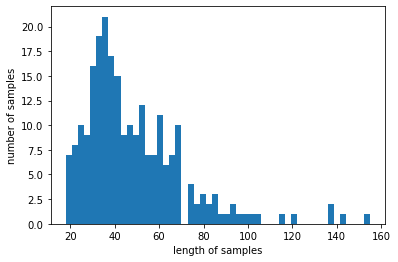

In [32]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [33]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [34]:
max_len = 100
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 100 이하인 샘플의 비율: 96.63865546218487


In [35]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [43]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units))) # Bidirectional LSTM을 사용
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100, callbacks=[es, mc], batch_size=256, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6903 - acc: 0.6000 - val_loss: 0.6823 - val_acc: 0.5625

Epoch 00001: val_acc improved from -inf to 0.56250, saving model to best_model.h5
Epoch 2/100
1/1 [==============================] - 1s 674ms/step - loss: 0.6645 - acc: 0.6053 - val_loss: 0.7064 - val_acc: 0.5625

Epoch 00002: val_acc did not improve from 0.56250
Epoch 3/100
1/1 [==============================] - 1s 668ms/step - loss: 0.6593 - acc: 0.6053 - val_loss: 0.6739 - val_acc: 0.5625

Epoch 00003: val_acc did not improve from 0.56250
Epoch 4/100
1/1 [==============================] - 1s 672ms/step - loss: 0.6444 - acc: 0.6263 - val_loss: 0.6631 - val_acc: 0.5625

Epoch 00004: val_acc did not improve from 0.56250
Epoch 5/100
1/1 [==============================] - 1s 681ms/step - loss: 0.5917 - acc: 0.6158 - val_loss: 2.5720 - val_acc: 0.5625

Epoch 00005: val_acc did not improve from 0.56250
Epoch 6/100
1/1 [==============================] - 1s 703ms/s

In [44]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

3/3 [==============================] - 1s 21ms/step - loss: 0.5567 - acc: 0.7625
테스트 정확도: 0.7625


## 9. 리뷰예측

In [45]:
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = mecab.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [51]:
sentiment_predict('오랜시간 기다림에 비해 실망스런 앱이에요! 1. 메뉴 사용이 너무 불편해요! 사진첩 안에 그 흔하디 흔한 드롭다운 메뉴도 없어요! 다른 사진첩 들어가려면 뒤로가기해서 메뉴 펼치고 사진첩 골라야해요! 2. 사진첩 목록에 사진이나 영상 수가 표시 되지 않아요! 꼭 사진첩에 들어가야만 그 수를 알수 있어요! 3. 사진 확대나 다운로드 기능이 없어요! 확대는 그렇다치고 내 사진 내가 다운 못받는다는건 불합리해 보이네요! 4. 가장 최악인건 이런 의견 작성했다고 리뷰를 번번히 지워요! 작성자에 통보도 없이 리뷰를 삭제하는것이 정상 인가요? ** 작성한 리뷰를 삐딱하게 받아들이지 말고 다음 업데이트 때는 단 한가지라도 개선 되길 바래봅니다.')

61.17% 확률로 부정 리뷰입니다.


In [52]:
sentiment_predict('10년전 추억을 살려주셔서 감사합니다. 이 많은 자료들을 버리지 않고 지켜주셔서 너무 감사하고요. 많이 복구된 상태에서 몇가지 건의 드립니다. 1. 게시한 사진첩이나 글을 수정과 게시폴더 이동 등이 가능했으면 좋겠습니다. 사진이 정사각형으로 짤리는 것도 좀 불편합니다. 2. 페이퍼나 블로그를 통합, 별도, 삭제할지도 선택할 수 있으면 좋겠습니다. (아직 복구가 안된건지 기다려봅니다만 솔직히 그냥 미니홈피만으로도 만족합니다 ^^) 사진첩 게시판 폴더들이 같은게 두개씩 나와서 폴더 추가가 안되네요. 3. 예전 싸이월드 폼처럼 왼쪽에 사진첩 폴더가 있고 오른쪽에 사진이 보이는 방식이나 오른쪽에 책갈피처럼 양식이 이루어지면 더욱 편할 것 같습니다. 4. 일촌 목록이 공개되어지는데 일촌수와 일촌명단도 비공개, 일촌공개, 전체공개 등 수정이 가능했으면 좋겠습니다. 5. 방명록도 홈피주인과 게시자만 볼수있게 비밀글 설정이 가능했으면 좋겠습니다. 많은 노고에 감사드립니다.')

73.54% 확률로 긍정 리뷰입니다.


In [56]:
sentiment_predict('사진 업데이트가 되었다고 알림이 오지않기에 사진첩 복구가 완료되길 기다리느라 매일같이 앱을 실행해서 들어가보았습니다. 드디어 사진첩이 복구되었는지 숫자가 생겨서 신나가지고 사진첩을 터치했는데...앱이 강제종료되어버리네요.. 다른 부분은 정상적으로 이용이 가능한데 사진첩만 누르면 앱이 튕겨버리니 추억을 볼수가없네요; 앱 최신 업데이트 완료한 후에 사진첩이 업데이트 되었고, 혹시 몰라서 삭제 후 다시 설치하였는데도 계속 앱이 종료됩니다.')

77.68% 확률로 부정 리뷰입니다.


In [50]:
sentiment_predict('싸이월드가 돌아오다니 너무 반갑습니다만 아쉬운점 생각나는거 몇개 적어봅니다. 1. 일촌 홈피의 접근성 지금은 그냥 목록나열만 나오는데 이름순, 업데이트순(기분상태나 게시물 등) 등 있으면 좋겠습니다. 2.프로필 사진 설정 프로필사진 선택시 핸드폰내 앨범 폴더별로 들어가서 선택이 가능해야될듯 합니다. 지금은 그냥 사진폴더 통합으로 나솝니다. 3. 뮤직스토어 관련 음악 검색하기가 힘듭니다. 가수명 검색하면 검색이 안되고 장바구니나 찜목록 있으면 좋겠습니다. 그리고 곡 상세보기 만들어서 그곡의 앨범곡, 아티스트의 다른곡도 볼수있으면 합니다. 4. 게시물 수정 불가 사진 게시물 몇개 잘못 올려서 수정 하려고 보니 수정버튼 자체가 없네요. 그외에도 많은데 업데이트 되면서 아직 출시전인 기능과 불편한점들 보완되길 기다리겠습니다.')

73.98% 확률로 긍정 리뷰입니다.
